### RNN / LSTM 知识背景补充：

* 1. 参考资源：http://karpathy.github.io/2015/05/21/rnn-effectiveness/ ;


### 实现思路

#### 第1步：数据文件加载、预处理、可视化；
#### 第2步：特征工程（构建数据集）；
#### 第3步：模型搭建；
#### 第4步：模型编译、训练；
#### 第5步：模型保存；
#### 第6步：模型预测；

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import requests
import re

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils

import warnings
warnings.filterwarnings('ignore')

### 第1步：数据文件加载、预处理、可视化

##### ① 数据文件加载

In [2]:
# 数据文件url

url = "https://cs.stanford.edu/people/karpathy/namesGenUnique.txt"

##### 方式 1：wget

In [3]:
file1 = wget.download(url, "names.txt")

In [4]:
with open(file1) as f:
    data = f.read().split('\n')

In [5]:
data[:5]

['jka', 'Dillie', 'Ryine', 'Cherita', 'Dasher']

In [6]:
data_len = len(data)

data_len

7329

##### 方式 2：requests

In [7]:
file2 = requests.get(url)

In [8]:
content = file2.text

In [9]:
content[:50]

'jka\nDillie\nRyine\nCherita\nDasher\nChailine\nFrennide\n'

In [10]:
data2 = content.split('\n')

data2[:5]

['jka', 'Dillie', 'Ryine', 'Cherita', 'Dasher']

In [11]:
data2_len = len(data2)

data2_len

7329

##### ② 数据统预处理

In [12]:
dataset = ''

for s in data:
    dataset = dataset + s + ' '

In [13]:
dataset

'jka Dillie Ryine Cherita Dasher Chailine Frennide Gremaley Patj Handi Gully Wennie Ferentra Jixandlia Slimele Elispor Kathine Masdadina Chilcina Tiz Jolina Corbenton Haustina Delimeet Eppal Molenia Frecki Senny Helphon Saminda Ka Wynther Helsey Misa Lynetta Halonie Bartta Anathea Helricka Enezela Sherlees Randon Nokminia Belli RoWindon Jaena Meralin Orgen Whad Meyne Luchine Alogge Gren Kollette Leath Corth Mariedia Rhul Genylena Akepy Gabdie Jehn Rocelle Joeno Meruann Kainy Diliar Olell Welke Lileen Arti Valira Paynir Juvinge Krady Mogna Shabfoe Mandelina Rosatha Dacine Ull Vonell Elword Angrelly Kodilla Louge Temmie Gerthe Fildhine Olyna Dibfie Harmin Mellina Edongia Lorant Baires Dasher Quengy Kens Paac Jeencia Jaiep Deua Analine Mifalia Conette Dovanice Tyberr Irda Gerfand Auberro Thamosa Babrield Kait Stephepoa Abi Chrristen Stephanna Racky Dones Lys Vira Phela Deney Dorah Avet Ca iunia Jasqquosius Esty Solumote Hilling Gredie Dynae Berdiah Suynn Tile Blian Mancie Tovey JotaLine M

In [14]:
set(dataset)

{' ',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [15]:
dataset = re.sub("[-.0-9:]", "", dataset)

In [16]:
set(dataset)

{' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [17]:
dataset

'jka Dillie Ryine Cherita Dasher Chailine Frennide Gremaley Patj Handi Gully Wennie Ferentra Jixandlia Slimele Elispor Kathine Masdadina Chilcina Tiz Jolina Corbenton Haustina Delimeet Eppal Molenia Frecki Senny Helphon Saminda Ka Wynther Helsey Misa Lynetta Halonie Bartta Anathea Helricka Enezela Sherlees Randon Nokminia Belli RoWindon Jaena Meralin Orgen Whad Meyne Luchine Alogge Gren Kollette Leath Corth Mariedia Rhul Genylena Akepy Gabdie Jehn Rocelle Joeno Meruann Kainy Diliar Olell Welke Lileen Arti Valira Paynir Juvinge Krady Mogna Shabfoe Mandelina Rosatha Dacine Ull Vonell Elword Angrelly Kodilla Louge Temmie Gerthe Fildhine Olyna Dibfie Harmin Mellina Edongia Lorant Baires Dasher Quengy Kens Paac Jeencia Jaiep Deua Analine Mifalia Conette Dovanice Tyberr Irda Gerfand Auberro Thamosa Babrield Kait Stephepoa Abi Chrristen Stephanna Racky Dones Lys Vira Phela Deney Dorah Avet Ca iunia Jasqquosius Esty Solumote Hilling Gredie Dynae Berdiah Suynn Tile Blian Mancie Tovey JotaLine M

In [18]:
dataset = dataset.lower()

In [19]:
dataset

'jka dillie ryine cherita dasher chailine frennide gremaley patj handi gully wennie ferentra jixandlia slimele elispor kathine masdadina chilcina tiz jolina corbenton haustina delimeet eppal molenia frecki senny helphon saminda ka wynther helsey misa lynetta halonie bartta anathea helricka enezela sherlees randon nokminia belli rowindon jaena meralin orgen whad meyne luchine alogge gren kollette leath corth mariedia rhul genylena akepy gabdie jehn rocelle joeno meruann kainy diliar olell welke lileen arti valira paynir juvinge krady mogna shabfoe mandelina rosatha dacine ull vonell elword angrelly kodilla louge temmie gerthe fildhine olyna dibfie harmin mellina edongia lorant baires dasher quengy kens paac jeencia jaiep deua analine mifalia conette dovanice tyberr irda gerfand auberro thamosa babrield kait stephepoa abi chrristen stephanna racky dones lys vira phela deney dorah avet ca iunia jasqquosius esty solumote hilling gredie dynae berdiah suynn tile blian mancie tovey jotaline m

In [20]:
# 数据集中不同的字符个数

unique_char_length = len(set(dataset))

unique_char_length

27

In [21]:
# 创建字典，格式 -->  字符 : ID
char_to_id = {c : i for i, c in enumerate(sorted(set(dataset)))}

In [22]:
char_to_id

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [23]:
# 创建字典，格式 -->  ID : 字符
id_to_char = {v : k for k, v in char_to_id.items()}

In [24]:
id_to_char

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

##### ③ 可视化

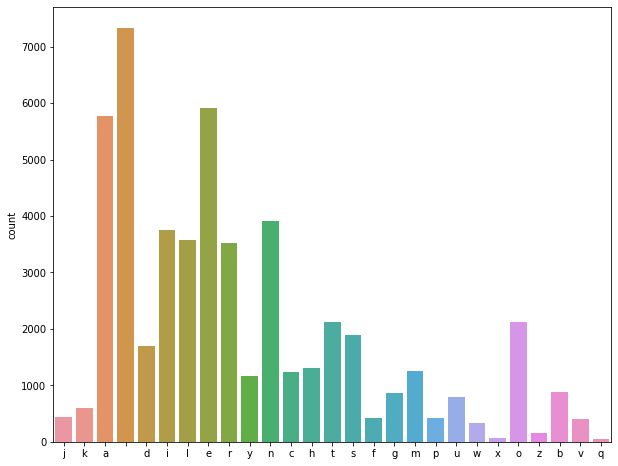

In [25]:
# 根据每个char出现的频次进行统计

plt.figure(figsize=(10,8))
sns.countplot(list(dataset))
plt.show()

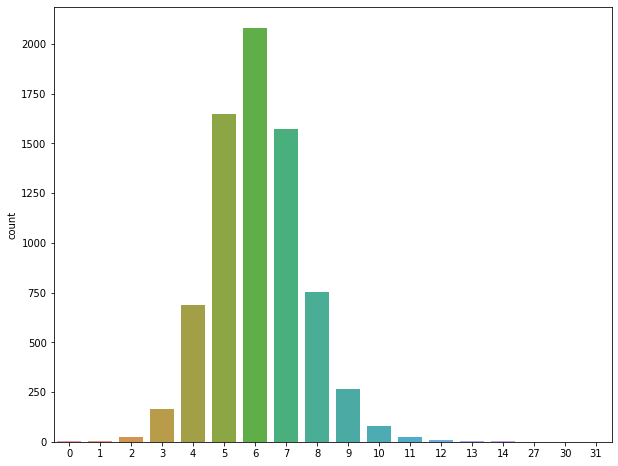

In [26]:
# 计算每个name的长度
names_len = [len(s) for s in data]

# 根据name的长度，统计分布
plt.figure(figsize=(10,8))
sns.countplot(names_len)
plt.show()

### 第2步：特征工程（构建数据集）

##### ① 超参数定义

In [27]:
# 超参数定义

MAX_LEN = 6 # 序列长度
BATCH_SIZE = 32 # 每个batch的大小

X = [] # 保存数据集
y = [] # 保存标签集

#### ② 构建训练数据集和标签集

In [28]:
# 创建数据集和标签集，序列长度为 6

for i in list(range(0, len(dataset)-MAX_LEN)):
    data_sequence = dataset[i:i+MAX_LEN] # 序列长度为MAX_LEN的数据
    data_label = dataset[MAX_LEN] # 序列对应的标签（字符）
    X.append([char_to_id[c] for c in data_sequence]) # 保存生成的序列数据
    y.append([char_to_id[data_label]]) # 保存生成的标签数据

In [29]:
X_arr = np.array(X) # list类型转换为array类型

X_arr.shape

(52038, 6)

In [30]:
X_arr[:5] # 显示前5个序列数据

array([[10, 11,  1,  0,  4,  9],
       [11,  1,  0,  4,  9, 12],
       [ 1,  0,  4,  9, 12, 12],
       [ 0,  4,  9, 12, 12,  9],
       [ 4,  9, 12, 12,  9,  5]])

In [31]:
y_arr = np.array(y) # list类型转换为array类型

y_arr.shape

(52038, 1)

In [32]:
y_arr[:5] # 显示前5个序列数据对应的标签

array([[12],
       [12],
       [12],
       [12],
       [12]])

##### ③  数据归一化、reshape、onehot-encoding

In [33]:
# 数据归一化

X_arr = X_arr / unique_char_length

In [34]:
X_arr[:5]

array([[0.37037037, 0.40740741, 0.03703704, 0.        , 0.14814815,
        0.33333333],
       [0.40740741, 0.03703704, 0.        , 0.14814815, 0.33333333,
        0.44444444],
       [0.03703704, 0.        , 0.14814815, 0.33333333, 0.44444444,
        0.44444444],
       [0.        , 0.14814815, 0.33333333, 0.44444444, 0.44444444,
        0.33333333],
       [0.14814815, 0.33333333, 0.44444444, 0.44444444, 0.33333333,
        0.18518519]])

In [35]:
# 数据集reshape，转换为LSTM输入的shape

X_arr = X_arr.reshape((len(X_arr), MAX_LEN, 1))

X_arr.shape

(52038, 6, 1)

In [36]:
X_arr[:5]

array([[[0.37037037],
        [0.40740741],
        [0.03703704],
        [0.        ],
        [0.14814815],
        [0.33333333]],

       [[0.40740741],
        [0.03703704],
        [0.        ],
        [0.14814815],
        [0.33333333],
        [0.44444444]],

       [[0.03703704],
        [0.        ],
        [0.14814815],
        [0.33333333],
        [0.44444444],
        [0.44444444]],

       [[0.        ],
        [0.14814815],
        [0.33333333],
        [0.44444444],
        [0.44444444],
        [0.33333333]],

       [[0.14814815],
        [0.33333333],
        [0.44444444],
        [0.44444444],
        [0.33333333],
        [0.18518519]]])

In [37]:
# 标签进行onehot_encoding

y_arr = tf.keras.utils.to_categorical(y_arr)

y_arr.shape

(52038, 13)

In [38]:
y_arr[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

### 第3步：模型搭建

In [39]:
model = Sequential([
    layers.LSTM(256, input_shape=(MAX_LEN, 1), return_sequences=True),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(y_arr.shape[1], activation='softmax')
])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 256)            264192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 128)            197120    
_________________________________________________________________
dropout (Dropout)            (None, 6, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 13)                845       
Total params: 511,565
Trainable params: 511,565
Non-trainable params: 0
__________________________________________________

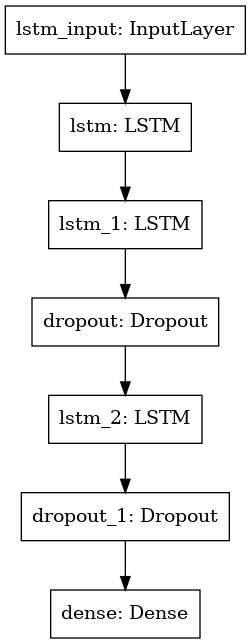

In [41]:
# 模型结构图
utils.plot_model(model)

### 第4步：模型编译、训练

In [42]:
# 模型编译
model.compile(optimizer='adam',
              loss='categorical_crossentropy')

In [43]:
# 保存模型权重

filepath = "model_wegiths.hdf5" # 权重文件

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                save_weights_only=True,
                                                monitor='loss',
                                                mode='min',
                                                save_best_only=True)


# 参考链接：https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [44]:
# 定义ealry_stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  mode='min',
                                                  patience=3)

# 参考链接：https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [45]:
# 模型训练

history = model.fit(X_arr,
                    y_arr,
                    epochs=40,
                    batch_size=64,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/40
814/814 [==============================] - 10s 8ms/step - loss: 0.0331
Epoch 2/40
814/814 [==============================] - 4s 5ms/step - loss: 3.7186e-05
Epoch 3/40
814/814 [==============================] - 3s 3ms/step - loss: 1.6611e-05
Epoch 4/40
814/814 [==============================] - 3s 3ms/step - loss: 8.7955e-06
Epoch 5/40
814/814 [==============================] - 3s 3ms/step - loss: 5.1931e-06
Epoch 6/40
814/814 [==============================] - 4s 5ms/step - loss: 3.2578e-06
Epoch 7/40
814/814 [==============================] - 3s 4ms/step - loss: 2.0733e-06
Epoch 8/40
814/814 [==============================] - 4s 5ms/step - loss: 1.3351e-06
Epoch 9/40
814/814 [==============================] - 4s 5ms/step - loss: 8.7445e-07
Epoch 10/40
814/814 [==============================] - 4s 5ms/step - loss: 5.8160e-07
Epoch 11/40
814/814 [==============================] - 4s 5ms/step - loss: 3.8110e-07
Epoch 12/40
814/814 [==============================] - 4s 4ms/step

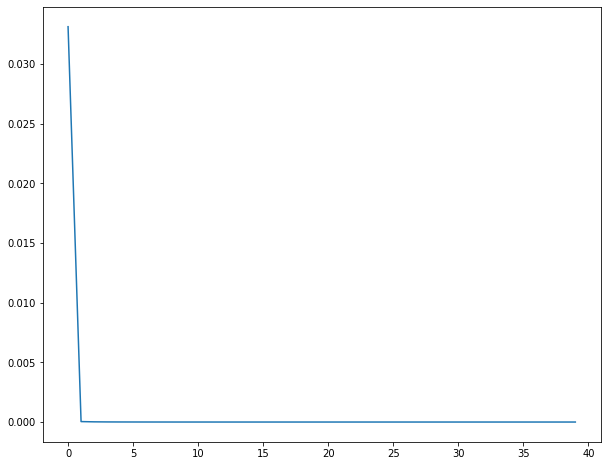

In [46]:
# 绘制 loss

plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.show()

### 第5步：模型保存

In [47]:
model.save("name_predict_model.h5")

### 第6步：模型预测

#### ① 测试 1

In [48]:
# 测试 1

sample_1 = "Marson"

# char_to_id

s_1 = [char_to_id[c.lower()] for c in sample_1]

s_1

[13, 1, 18, 19, 15, 14]

In [49]:
# 归一化

s_1 = np.array(s_1) / unique_char_length

s_1

array([0.48148148, 0.03703704, 0.66666667, 0.7037037 , 0.55555556,
       0.51851852])

In [50]:
# reshape

s_1 = s_1.reshape(1, MAX_LEN, 1)

s_1.shape

(1, 6, 1)

In [51]:
# 预测

res_1 = model.predict(s_1)

In [52]:
res_1

array([[9.84183048e-12, 1.18489819e-11, 1.23045523e-11, 1.14013157e-11,
        1.11031835e-11, 9.74640941e-12, 1.16384784e-11, 1.18254347e-11,
        1.04729385e-11, 1.10004427e-11, 1.11848482e-11, 1.26679778e-11,
        1.00000000e+00]], dtype=float32)

In [53]:
# 最大概率值索引

id = np.argmax(res_1)

id

12

In [54]:
# 对应的char

id_char = id_to_char[id]

id_char

'l'

In [55]:
# 假设生成100个字符

sample_1 = "Marson"

# char_to_id

s_1 = np.array([char_to_id[c.lower()] for c in sample_1])


a = list(s_1)

In [56]:
for i in range(50):
    print(i)
    s_1 = s_1.reshape(1, MAX_LEN, 1) # shape转换
    s_1 = np.array(s_1) / unique_char_length
    res = model.predict(s_1) # 模型预测
    max_id = np.argmax(res) # 最大概率值的索引
    max_char = id_to_char[max_id] # 索引对应的字符
    print("第{}轮，下一个字符：{}".format(i, max_char))
    a.append(max_id)
    s_1 = np.array(a[i+1 : i+MAX_LEN+1]) # 往后挪一位

0
第0轮，下一个字符：l
1
第1轮，下一个字符：l
2
第2轮，下一个字符：l
3
第3轮，下一个字符：l
4
第4轮，下一个字符：l
5
第5轮，下一个字符：l
6
第6轮，下一个字符：l
7
第7轮，下一个字符：l
8
第8轮，下一个字符：l
9
第9轮，下一个字符：l
10
第10轮，下一个字符：l
11
第11轮，下一个字符：l
12
第12轮，下一个字符：l
13
第13轮，下一个字符：l
14
第14轮，下一个字符：l
15
第15轮，下一个字符：l
16
第16轮，下一个字符：l
17
第17轮，下一个字符：l
18
第18轮，下一个字符：l
19
第19轮，下一个字符：l
20
第20轮，下一个字符：l
21
第21轮，下一个字符：l
22
第22轮，下一个字符：l
23
第23轮，下一个字符：l
24
第24轮，下一个字符：l
25
第25轮，下一个字符：l
26
第26轮，下一个字符：l
27
第27轮，下一个字符：l
28
第28轮，下一个字符：l
29
第29轮，下一个字符：l
30
第30轮，下一个字符：l
31
第31轮，下一个字符：l
32
第32轮，下一个字符：l
33
第33轮，下一个字符：l
34
第34轮，下一个字符：l
35
第35轮，下一个字符：l
36
第36轮，下一个字符：l
37
第37轮，下一个字符：l
38
第38轮，下一个字符：l
39
第39轮，下一个字符：l
40
第40轮，下一个字符：l
41
第41轮，下一个字符：l
42
第42轮，下一个字符：l
43
第43轮，下一个字符：l
44
第44轮，下一个字符：l
45
第45轮，下一个字符：l
46
第46轮，下一个字符：l
47
第47轮，下一个字符：l
48
第48轮，下一个字符：l
49
第49轮，下一个字符：l


In [57]:
a

[13,
 1,
 18,
 19,
 15,
 14,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12]

In [58]:
a_char = [id_to_char[i] for i in a]

a_char

['m',
 'a',
 'r',
 's',
 'o',
 'n',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l']

#### ② 测试 2

In [62]:
# 假设生成100个字符

sample_2 = "tommyt"

# char_to_id

s_2 = np.array([char_to_id[c.lower()] for c in sample_2])


a = list(s_2)

a

[20, 15, 13, 13, 25, 20]

In [63]:
for i in range(100):
    print(i)
    s_2 = s_2.reshape(1, MAX_LEN, 1) # shape转换
    s_2 = np.array(s_2) / unique_char_length
    res = model.predict(s_2) # 模型预测
    max_id = np.argmax(res) # 最大概率值的索引
    max_char = id_to_char[max_id] # 索引对应的字符
    #print("第{}轮，下一个字符：{}".format(i, max_char))
    a.append(max_id)
    s_2 = np.array(a[i+1 : i+MAX_LEN+1]) # 往后挪一位

0
[15 13 13 25 20 12]
1
[13 13 25 20 12 12]
2
[13 25 20 12 12 12]
3
[25 20 12 12 12 12]
4
[20 12 12 12 12 12]
5
[12 12 12 12 12 12]
6
[12 12 12 12 12 12]
7
[12 12 12 12 12 12]
8
[12 12 12 12 12 12]
9
[12 12 12 12 12 12]
10
[12 12 12 12 12 12]
11
[12 12 12 12 12 12]
12
[12 12 12 12 12 12]
13
[12 12 12 12 12 12]
14
[12 12 12 12 12 12]
15
[12 12 12 12 12 12]
16
[12 12 12 12 12 12]
17
[12 12 12 12 12 12]
18
[12 12 12 12 12 12]
19
[12 12 12 12 12 12]
20
[12 12 12 12 12 12]
21
[12 12 12 12 12 12]
22
[12 12 12 12 12 12]
23
[12 12 12 12 12 12]
24
[12 12 12 12 12 12]
25
[12 12 12 12 12 12]
26
[12 12 12 12 12 12]
27
[12 12 12 12 12 12]
28
[12 12 12 12 12 12]
29
[12 12 12 12 12 12]
30
[12 12 12 12 12 12]
31
[12 12 12 12 12 12]
32
[12 12 12 12 12 12]
33
[12 12 12 12 12 12]
34
[12 12 12 12 12 12]
35
[12 12 12 12 12 12]
36
[12 12 12 12 12 12]
37
[12 12 12 12 12 12]
38
[12 12 12 12 12 12]
39
[12 12 12 12 12 12]
40
[12 12 12 12 12 12]
41
[12 12 12 12 12 12]
42
[12 12 12 12 12 12]
43
[12 12 12 12 12 12

In [61]:
a_char = [id_to_char[i] for i in a]

a_char

['t',
 'o',
 'm',
 'm',
 'y',
 't',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l']